In [1]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df = pd.read_pickle("../data/gp-history_USA-193.pkl.gz","gzip")
df.EPOCH  = pd.to_datetime(df.EPOCH, infer_datetime_format=True)
df = df.set_index(df.EPOCH)
df

,NORAD_CAT_ID,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS
EPOCH,,,,,,,,,,,,,,,,,,,
2008-02-26 06:28:42.994847,32502,2008-02-26 06:28:42.994847,14.276680,0.088170,57.2436,6.9378,62.6549,306.6959,0,U,999,73,0.005631,0.059321,0.000008,7177.677,100.863,1432.397,166.688
2008-02-26 06:28:42.994847,32502,2008-02-26 06:28:42.994847,14.276680,0.088170,57.2436,6.9378,62.6549,306.6959,0,U,999,73,0.005631,0.059321,0.000008,7177.677,100.863,1432.397,166.688
2008-02-27 00:54:07.240320,32502,2008-02-27 00:54:07.240320,14.399764,0.083620,57.2262,4.1353,63.6059,310.7238,0,U,999,84,0.005611,0.074468,0.000008,7136.717,100.001,1355.354,161.811
2008-02-27 05:52:03.042624,32502,2008-02-27 05:52:03.042624,14.448921,0.081356,57.2555,3.3614,64.0891,305.2461,0,U,999,87,0.007824,0.100038,0.000008,7120.522,99.661,1321.682,163.092
2008-02-28 08:13:35.129280,32502,2008-02-28 08:13:35.129280,14.741211,0.069074,57.2641,359.2098,66.5334,309.1735,0,U,999,103,0.012348,0.176939,0.000009,7026.084,97.685,1133.270,162.628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-09-26 15:34:49.394784,35425,2009-09-26 15:34:49.394784,15.367304,0.034527,56.1183,6.0557,29.7170,329.6798,0,U,999,6078,0.000935,0.003185,0.000009,6833.926,93.705,691.748,219.835
2009-10-03 14:23:40.277471,35425,2009-10-03 14:23:40.277471,15.412508,0.032428,56.1172,335.5630,45.4257,317.8063,0,U,999,6185,0.001009,0.003443,0.000038,6820.557,93.430,663.600,221.245
2009-10-27 08:50:46.588128,35425,2009-10-27 08:50:46.588128,16.042014,0.009871,56.1206,227.2647,106.1540,254.9798,0,U,999,6551,0.002313,0.029832,0.000011,6640.939,89.764,328.354,197.254


In [3]:
first = df.groupby(by=["NORAD_CAT_ID"]).first()
last = df.groupby(by=["NORAD_CAT_ID"]).last()

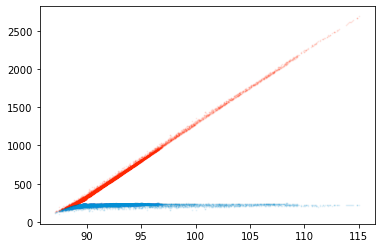

In [4]:
plt.scatter(df.PERIOD, df.APOAPSIS, color='#fe270010', s=1)
plt.scatter(df.PERIOD, df.PERIAPSIS, color='#038fd510', s=1)
plt.show()

OK this was super disappointing, because the altitude was so low when USA-193 got hit, there is no "left" part of the gabbard chart.

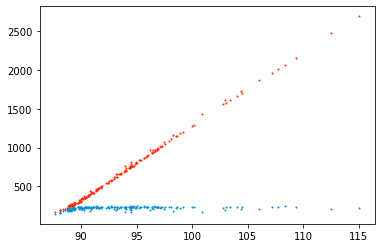

In [5]:
plt.scatter(first.PERIOD, first.APOAPSIS, color='#fe2700ff', s=1)
plt.scatter(first.PERIOD, first.PERIAPSIS, color='#038fd5ff', s=1)
plt.show()

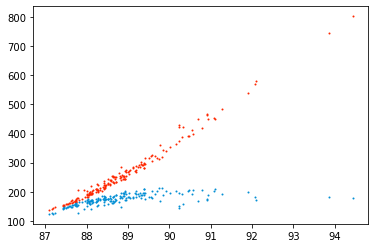

In [6]:
plt.scatter(last.PERIOD, last.APOAPSIS, color='#fe2700ff', s=1)
plt.scatter(last.PERIOD, last.PERIAPSIS, color='#038fd5ff', s=1)
plt.show()

In [20]:
test = df.groupby('NORAD_CAT_ID').resample('D').last().interpolate(method='linear', limit=31)
# interpolated linearly, not sure if it makes sense but it's the only option to do it quickly
# due to the limitation on multiindex interpolation.
test = test.drop(columns=["EPOCH","NORAD_CAT_ID"]).reset_index()
test

,NORAD_CAT_ID,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS
0,32502,2008-02-26,14.276680,0.088170,57.243600,6.937800,62.654900,306.695900,0.0,U,999.0,73.00,0.005631,0.059321,0.000008,7177.677000,100.86300,1432.397000,166.688000
1,32502,2008-02-27,14.448921,0.081356,57.255500,3.361400,64.089100,305.246100,0.0,U,999.0,87.00,0.007824,0.100038,0.000008,7120.522000,99.66100,1321.682000,163.092000
2,32502,2008-02-28,14.741211,0.069074,57.264100,359.209800,66.533400,309.173500,0.0,U,999.0,103.00,0.012348,0.176939,0.000009,7026.084000,97.68500,1133.270000,162.628000
3,32502,2008-02-29,15.957194,0.021278,57.332600,352.591200,73.175100,335.015500,0.0,U,999.0,128.00,0.008176,0.798382,0.000011,6664.451000,90.24100,428.126000,144.507000
4,32503,2008-02-26,13.583866,0.111624,58.291600,7.922200,14.720800,348.257200,0.0,U,999.0,77.00,0.008982,0.018330,0.000006,7419.703000,106.00800,1869.781000,213.354000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4300,35425,2009-10-24,15.963326,0.012690,56.120175,240.801987,98.562962,262.833113,0.0,NaN,999.0,6505.25,0.002150,0.026534,0.000014,6663.391250,90.22225,370.259750,200.252875
4301,35425,2009-10-25,15.989555,0.011750,56.120317,236.289558,101.093308,260.215342,0.0,NaN,999.0,6520.50,0.002204,0.027633,0.000013,6655.907167,90.06950,356.291167,199.253250
4302,35425,2009-10-26,16.015785,0.010810,56.120458,231.777129,103.623654,257.597571,0.0,NaN,999.0,6535.75,0.002259,0.028733,0.000012,6648.423083,89.91675,342.322583,198.253625
4303,35425,2009-10-27,16.042014,0.009871,56.120600,227.264700,106.154000,254.979800,0.0,U,999.0,6551.00,0.002313,0.029832,0.000011,6640.939000,89.76400,328.354000,197.254000


In [25]:
test.EPOCH.value_counts()
# looks like there won't be too many points to plot here but we should see something

2008-03-07    123
2008-03-10    123
2008-03-09    119
2008-03-11    118
2008-03-08    118
             ... 
2009-09-14      1
2009-10-07      1
2009-08-15      1
2008-09-18      1
2009-08-24      1
Name: EPOCH, Length: 355, dtype: int64

In [22]:
print(test.EPOCH.min(),test.EPOCH.max())

2008-02-26 00:00:00 2009-10-28 00:00:00
